In [2]:
import matplotlib.pyplot as plt

In [3]:
##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
def plot_data_internal(X, y):
    x_min, x_max = X[ : , 0 ].min () - 0.5 , X[ : , 0 ].max () + 0.5
    y_min, y_max = X[ : , 1 ].min () - 0.5 , X[ : , 1 ].max () + 0.5
    xx, yy = np.meshgrid (np.linspace (x_min , x_max , 100) , np.linspace (y_min , y_max , 100))
    plt.figure()
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    ax = plt.gca()
    ax.plot(X[y == 0 , 0], X[y == 0, 1], 'ro', label = 'Class 1')
    ax.plot(X[y == 1 , 0], X[y == 1, 1], 'bo', label = 'Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Plot data')
    plt.legend(loc = 'upper left', scatterpoints = 1, numpoints = 1)
    return xx, yy


##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
def plot_data (X, y):
    xx, yy = plot_data_internal (X, y)
    plt.show()


##
# x: input to the logistic function
def logistic(x): return 1.0/(1.0 + np.exp(-x))


##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
# w: current parameter values
def compute_average_ll(X, y, w):
    output_prob = logistic (np.dot(X, w))
    return np.mean (y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))


##
# ll: 1d array with the average likelihood per data point and dimension equal
# to the number of training epochs.
def plot_ll(ll):
    plt.figure()
    ax = plt.gca()
    plt.xlim(0, len(ll) + 2)
    plt.ylim(min(ll) - 0.1, max(ll) + 0.1)
    ax.plot(np.arange(1, len(ll) + 1), ll, 'r-')
    plt.xlabel('Steps')
    plt.ylabel('Average log - likelihood')
    plt.title('Plot Average Log - likelihood Curve')
    plt.show()


##
# x: 2d array with input features at which to compute predictions.
# (uses parameter vector w which is defined outside the function's scope)
def predict_for_plot(x):
    x_tilde = np.concatenate((x, np.ones((x.shape[ 0 ], 1 ))), 1)
    return logistic(np.dot(x_tilde, w))


##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
# predict : function that recives as input a feature matrix and returns a 1d
# vector with the probability of class 1.
def plot_predictive_distribution(X, y, predict):
    xx , yy = plot_data_internal(X, y)
    ax = plt.gca()
    X_predict = np.concatenate((xx.ravel().reshape((-1, 1)), yy.ravel().reshape((-1, 1))), 1)
    Z = predict(X_predict)
    Z = Z.reshape(xx. shape )
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 2)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)
    plt.show()
    
    ##
# l: hyper - parameter for the width of the Gaussian basis functions
# Z: location of the Gaussian basis functions
# X: points at which to evaluate the basis functions
def expand_inputs(l, X, Z):

    X2 = np.sum(X**2 , 1)   #squared every element and then sums the two columns into one "radial squared distance"
    Z2 = np.sum(Z**2 , 1)
    ones_Z = np.ones (Z.shape[ 0 ])
    ones_X = np.ones(X.shape[ 0 ])
    r2 = np.outer(X2 , ones_Z ) - 2 * np.dot(X, Z.T) + np.outer(ones_X, Z2)
    return np.exp(-0.5 / l**2 * r2)

##
# x: 2d array with input features at which to compute the predictions using the feature expansion
# ( uses parameter vector w and the 2d array X with the centers of the basis
# functions for the feature expansion , which are defined outside the function's scope )
def predict_for_plot_expanded_features(x):  #x s sze (10000,2)
    x_expanded = expand_inputs(l, x, centers)
    x_tilde = np.concatenate(( x_expanded, np.ones((x_expanded.shape[ 0 ], 1 ))), 1)
    return logistic(np.dot(x_tilde, w))

In [4]:
def confusion_matrix(y, X_tilde, beta):
    #apply thresholds to test data, use logistic classification from part A
    # p(y(n) = 1 | x_tilde(n)) = sigma(beta.T * x_tilde(n))
    # p(y(n) = 0 | x_tilde(n)) = 1 - sigma(beta.T * x_tilde(n))
    #use if p(y(n) | x_tilde(n)) > 0.5 then y(n) = 1
    
    #the logistic function just transforms weighted data to be between 0 and 1
    prob_y = logistic(np.dot(beta, X_tilde.T)) 
    
    #threshold each value of prob_y and if >0.5 assign assigned_y a value of 1 (true)
    assigned_y = []
    for n in range(0, len(y)):
        if prob_y[n] > 0.5:
            assigned_y.append(1)
        else:
            assigned_y.append(0)
            
    #compare assigned_y to true_y     
    true_negatives = 0; true_positives = 0; false_negatives = 0; false_positives = 0
    total_pos = 0
    
    for n in range(0, len(y)):
        #count the total number of negatives & positives
        if y[n] == 1: total_pos += 1
        
        #count the number of true_positives etc
        if (assigned_y[n] == 1) and y[n] == 1:
            true_positives += 1
        elif (assigned_y[n] != 1) and y[n] == 1:
            false_negatives += 1
        elif (assigned_y[n] == 0) and y[n] == 0:
            true_negatives += 1
        else:
            false_positives += 1
            
    #divide by number of tests to get fractions
    true_negatives /= (len(y) - total_pos); true_positives /= total_pos; false_negatives /= total_pos; false_positives /= (len(y) - total_pos)
    
    print("\n\nConfusion Matrix:\n")
    print("True negative/total negatives  = {}   |   False positive/total negatives = {}".format(true_negatives,false_positives))
    print("False negative/total positives = {}   |   True positive/total positives  = {}".format(false_negatives,true_positives))
    print("\n \n \n \n \n \n")


In [5]:
def train(y_train, X_t_train, y_t, X_tilde_t, alpha):
    iterations = 500
    ll_training = np.zeros([iterations]); ll_test = np.zeros([iterations])     #initialise log likelyhood array for training and test data
    beta = np.random.randn(X_t_train.shape[1])

    #gradient ascent to train data
    for n in range(0, iterations):
        sigma = logistic(np.dot(X_t_train, beta))
        gradients = (np.dot((y_train - sigma), X_t_train))
        beta = beta + alpha*gradients
        
        ll_training[n] = compute_average_ll(X_t_train, y_train, beta) # compute log likelyhood of each iteration
        ll_test[n] = compute_average_ll(X_tilde_t, y_t, beta)
        
        
    print("\n plot log likelihood of training data as a function of the number of iterations")
    plot_ll(ll_training)
    print("\n plot log-likelihood of test data (using gradients calculated from training data) vs iterations")
    plot_ll(ll_test)
    
    print("Final training log-likelihood per data point = " +  str(ll_training[-1]))   #note [-1] gives the last element in an array
    print("Final test log-likelihood per data point = " +  str(ll_test[-1]))

    return beta


plot all data


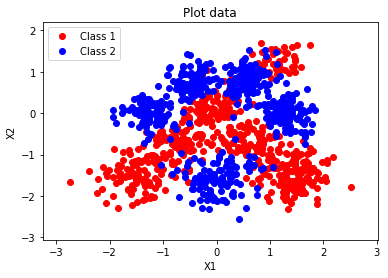

In [6]:
## A, B, C - Load and visualise data
    
import numpy as np

X = np.loadtxt('X.txt')
y = np.loadtxt('y.txt')
X_tilde = np.append(X, np.ones((1000,1)), axis=1) #create X_tilde

print("plot all data")
plot_data(X, y)


In [7]:
#####################
## D - split data set

Num_train = 700
X_training =  X[0:Num_train,:]
y_training = y[0:Num_train]

X_test = X[Num_train:,:]
y_test = y[Num_train:]

X_tilde_train = np.concatenate((X_training, np.ones((X_training.shape[0], 1))), 1)
X_tilde_test = np.concatenate((X_test, np.ones((X_test.shape[0], 1))), 1)



 plot log likelihood of training data as a function of the number of iterations


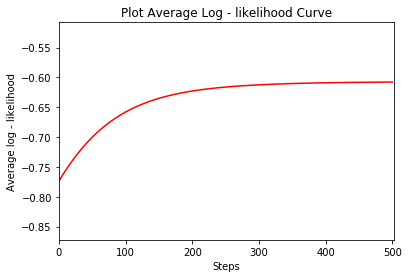


 plot log-likelihood of test data (using gradients calculated from training data) vs iterations


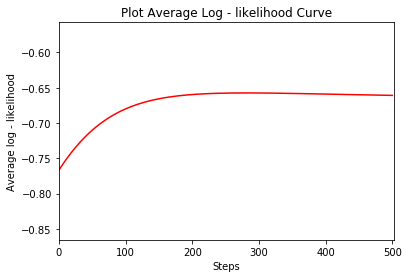

Final training log-likelihood per data point = -0.607653921941
Final test log-likelihood per data point = -0.660820863295

 plot probability contours on training data


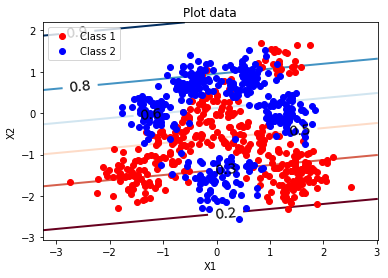


 plot probability contours on test data


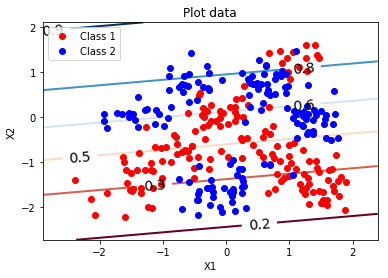

In [8]:
###################################################
## E - train classifier and plot probability contours

rate = 0.00005
beta = train(y_training, X_tilde_train, y_test, X_tilde_test, rate)
w = beta

#note that "predict for plot" generates X_tilde therefore only send X_training, not X_tilde_train
print("\n plot probability contours on training data")
plot_predictive_distribution(X_training, y_training, predict_for_plot)  #plot linear classifiers on plot
print("\n plot probability contours on test data")
plot_predictive_distribution(X_test, y_test, predict_for_plot) 

In [9]:
######################
## F- confusion matrix
confusion_matrix(y_test, X_tilde_test, beta)



Confusion Matrix:

True negative/total negatives  = 0.6815286624203821   |   False positive/total negatives = 0.3184713375796178
False negative/total positives = 0.32867132867132864   |   True positive/total positives  = 0.6713286713286714

 
 
 
 
 




 plot log likelihood of training data as a function of the number of iterations


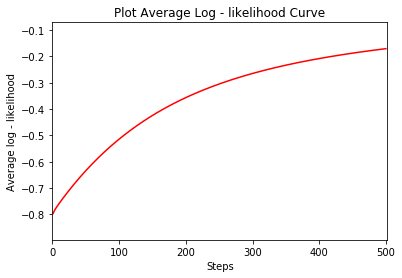


 plot log-likelihood of test data (using gradients calculated from training data) vs iterations


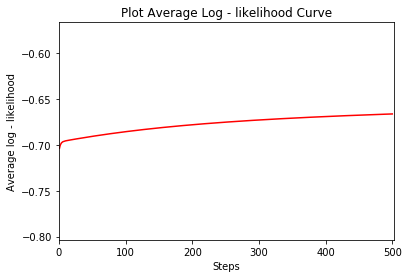

Final training log-likelihood per data point = -0.170341852755
Final test log-likelihood per data point = -0.666039506362

 plot probability contours on training data


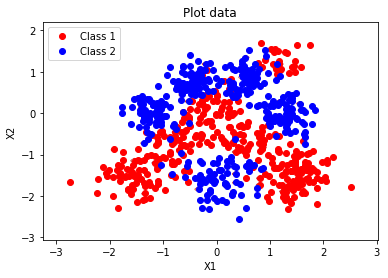


 plot probability contours on test data


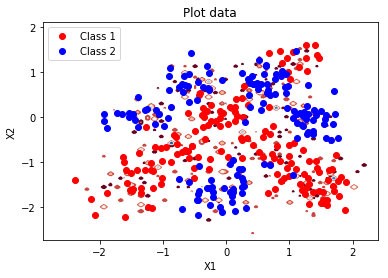



Confusion Matrix:

True negative/total negatives  = 0.9872611464968153   |   False positive/total negatives = 0.012738853503184714
False negative/total positives = 0.8881118881118881   |   True positive/total positives  = 0.11188811188811189

 
 
 
 
 


 plot log likelihood of training data as a function of the number of iterations


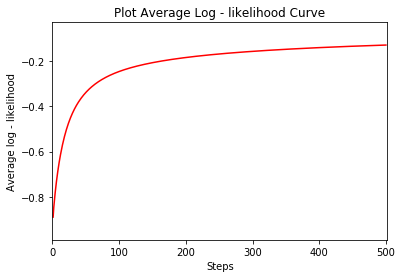


 plot log-likelihood of test data (using gradients calculated from training data) vs iterations


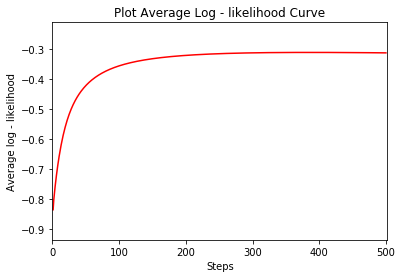

Final training log-likelihood per data point = -0.130162881674
Final test log-likelihood per data point = -0.313237747318

 plot probability contours on training data


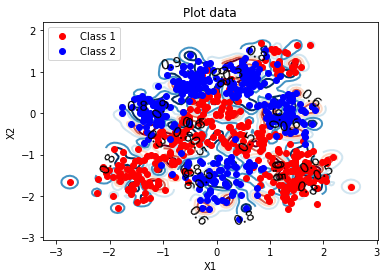


 plot probability contours on test data


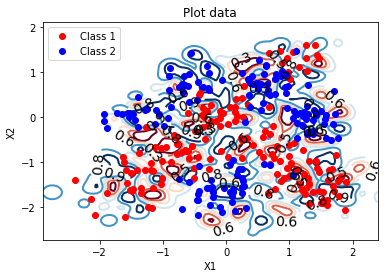



Confusion Matrix:

True negative/total negatives  = 0.89171974522293   |   False positive/total negatives = 0.10828025477707007
False negative/total positives = 0.1048951048951049   |   True positive/total positives  = 0.8951048951048951

 
 
 
 
 


 plot log likelihood of training data as a function of the number of iterations


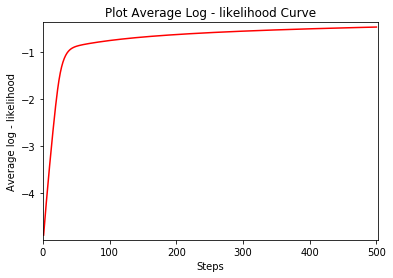


 plot log-likelihood of test data (using gradients calculated from training data) vs iterations


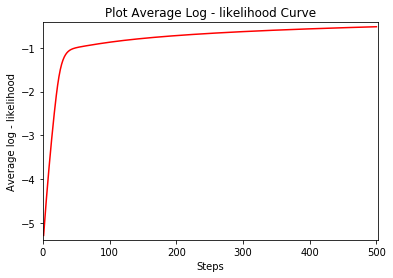

Final training log-likelihood per data point = -0.459338669446
Final test log-likelihood per data point = -0.516571913153

 plot probability contours on training data


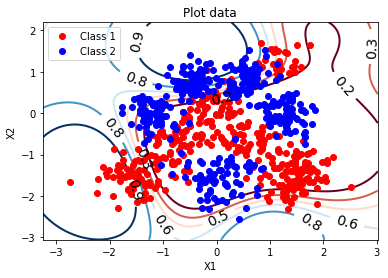


 plot probability contours on test data


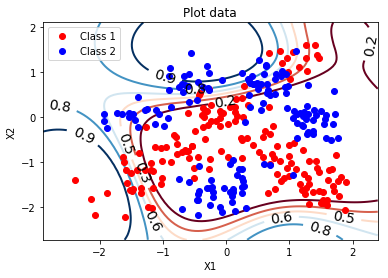



Confusion Matrix:

True negative/total negatives  = 0.7961783439490446   |   False positive/total negatives = 0.20382165605095542
False negative/total positives = 0.13286713286713286   |   True positive/total positives  = 0.8671328671328671

 
 
 
 
 



In [10]:
##############################
## G & H - Radial basis functions

centers = X_training  ##dont need x_tilde_train since we are interested in coordinates

#repeat for different standard deviations of the gaussian
basis_size = [0.01, 0.1, 1]; training_rates = [0.012, 0.0055, 0.000035]; i = 0
for l in basis_size:
    X_tilde_rbf_train = np.c_[np.ones(y_training.shape[0]), expand_inputs(l, X_training, centers)] #creates "x_tilde" for rfb x's
    X_tilde_rbf_test = np.c_[np.ones(y_test.shape[0]), expand_inputs(l, X_test, centers)]   
    
    rate_rbf = training_rates[i] # learning rate
    ##print("ytrain: " + str(y_training.shape) + "   X_tilde_rbf_train: " +str(X_tilde_rbf_train.shape) + "   y_test: " +str(y_test.shape) + "      X_tilde_rbf_test: " + str(X_tilde_rbf_test.shape))
    beta_rbf = train(y_training, X_tilde_rbf_train, y_test, X_tilde_rbf_test, rate_rbf)
    w = beta_rbf
    
    #note that "predict for plot" generates X_tilde therefore only send X_training, not X_tilde_train
    #print("X: " + str(X.shape) + "  y: " +str(y.shape) + "    beta_rbf: " + str(beta_rbf.shape))
    print("\n plot probability contours on training data")
    plot_predictive_distribution(X_training, y_training, predict_for_plot_expanded_features)  #plot linear classifiers on plot
    print("\n plot probability contours on test data")
    plot_predictive_distribution(X_test, y_test, predict_for_plot_expanded_features) 
    confusion_matrix(y_test, X_tilde_rbf_test, beta_rbf)
    
    i = i + 1